<a href="https://colab.research.google.com/github/luisgch2004/PC_01_QUIMICA/blob/main/Cinetica_quimica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
! pip install rdkit
! pip install pyscf

In [72]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

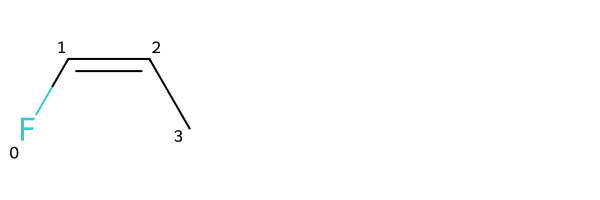

In [73]:
smiles = "F\C=C/C"

mol = Chem.MolFromSmiles(smiles)

Draw.MolsToGridImage([mol])

In [74]:
print(Chem.MolToMolBlock(mol))


     RDKit          2D

  4  3  0  0  0  0  0  0  0  0999 V2000
   -0.7500   -1.2990    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
M  END



In [75]:
Chem.MolToXYZFile(mol,"kc.xyz")

[23:53:22] Cannot write molecules with no conformers to XYZ block


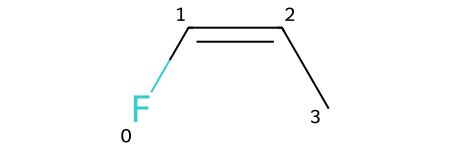

In [76]:
smiles = "F\C=C/C"
cis = Chem.MolFromSmiles(smiles)
cis

[23:53:27] Molecule does not have explicit Hs. Consider calling AddHs()


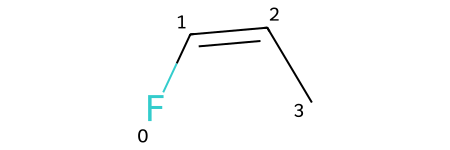

In [77]:
smiles = "F\C=C/C"
cis = Chem.MolFromSmiles(smiles)
Chem.AllChem.EmbedMolecule(cis)
Chem.MolToXYZFile(cis, "cis.xyz")
cis

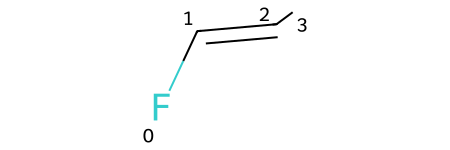

In [78]:
Chem.AllChem.SetDihedralDeg(cis.GetConformer(0),0,1,2,3,90.0)
Chem.MolToXYZFile(cis, "cis90.xyz")
cis

[23:53:32] Molecule does not have explicit Hs. Consider calling AddHs()


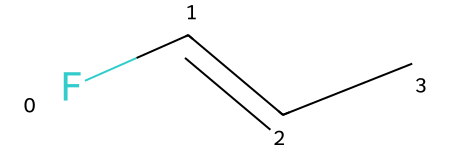

In [79]:
smiles = "F/C=C/C"
trans = Chem.MolFromSmiles(smiles)
Chem.AllChem.EmbedMolecule(trans)
Chem.MolToXYZFile(trans, "trans.xyz")
trans

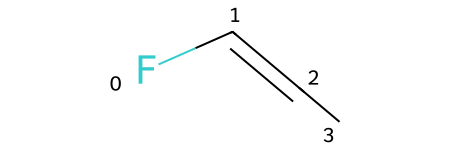

In [80]:
Chem.AllChem.SetDihedralDeg(trans.GetConformer(0),0,1,2,3,90.0)
Chem.MolToXYZFile(trans, "trans90.xyz")
trans

##energia de activacion y tipo de reaccion

In [43]:
!apt-get -qq install -y openbabel

Selecting previously unselected package libinchi1.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../libinchi1_1.03+dfsg-4_amd64.deb ...
Unpacking libinchi1 (1.03+dfsg-4) ...
Selecting previously unselected package libmaeparser1:amd64.
Preparing to unpack .../libmaeparser1_1.2.4-1build1_amd64.deb ...
Unpacking libmaeparser1:amd64 (1.2.4-1build1) ...
Selecting previously unselected package libopenbabel7.
Preparing to unpack .../libopenbabel7_3.1.1+dfsg-6ubuntu5_amd64.deb ...
Unpacking libopenbabel7 (3.1.1+dfsg-6ubuntu5) ...
Selecting previously unselected package openbabel.
Preparing to unpack .../openbabel_3.1.1+dfsg-6ubuntu5_amd64.deb ...
Unpacking openbabel (3.1.1+dfsg-6ubuntu5) ...
Setting up libmaeparser1:amd64 (1.2.4-1build1) ...
Setting up libinchi1 (1.03+dfsg-4) ...
Setting up libopenbabel7 (3.1.1+dfsg-6ubuntu5) ...
Setting up openbabel (3.1.1+dfsg-6ubuntu5) ...
Processing triggers for libc-bin (2.35-0ubuntu3.1) ...
/sbin/ldconfig.r

In [81]:
!obabel -i smi cis.txt -o sdf --gen3D > cis.sdf

1 molecule converted


In [82]:
!grep WARNING cis.sdf

In [83]:
!obabel -i sdf cis.sdf -o mol2 -O cis.mol2 -h -m

1 molecule converted


In [84]:
!obabel *.mol2 -O ciss.xyz --minimize --sd --steps 20000 --ff MMFF94 -p 7.4 --log -m


A T O M   T Y P E S

IDX	TYPE	RING
1	11	NO
2	2	NO
3	2	NO
4	1	NO
5	5	NO
6	5	NO
7	5	NO
8	5	NO
9	5	NO

F O R M A L   C H A R G E S

IDX	CHARGE
1	0.000000
2	0.000000
3	0.000000
4	0.000000
5	0.000000
6	0.000000
7	0.000000
8	0.000000
9	0.000000

P A R T I A L   C H A R G E S

IDX	CHARGE
1	-0.149500
2	-0.000500
3	-0.288200
4	0.138200
5	0.150000
6	0.150000
7	0.000000
8	0.000000
9	0.000000

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE & STRETCH-BEND CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...
SETTING UP ELECTROSTATIC CALCULATIONS...

S T E E P E S T   D E S C E N T

STEPS = 20000

STEP n       E(n)         E(n-1)    
------------------------------------
    0      -0.029      ----
   10    -0.02935    -0.02932
   20    -0.02959    -0.02957
   30    -0.02973    -0.02972
   40    -0.02981    -0.02980
   50    -0.02985    -0.02985
   60    -0.02988    -0.02988
   70   

In [85]:
from pyscf import gto, scf

In [86]:
Cis= gto.M(atom="ciss1.xyz")

In [87]:
Cis.basis = "3-21G"
mf = Cis.KS()
mf.xc = 'b3lyp'
Cis_energy = mf.kernel()

converged SCF energy = -214.246987795252


In [88]:
Cis_energy

-214.24698779525193

In [89]:
#trans
!obabel -i smi Trans.txt -o sdf --gen3D > trans.sdf

1 molecule converted


In [90]:
!grep WARNING trans.sdf

In [91]:
!obabel -i sdf trans.sdf -o mol2 -O trans.mol2 -h -m

1 molecule converted


In [92]:
!obabel trans1.mol2 -O transs.xyz --minimize --sd --steps 20000 --ff MMFF94 -p 7.4 --log -m


A T O M   T Y P E S

IDX	TYPE	RING
1	11	NO
2	2	NO
3	2	NO
4	1	NO
5	5	NO
6	5	NO
7	5	NO
8	5	NO
9	5	NO

F O R M A L   C H A R G E S

IDX	CHARGE
1	0.000000
2	0.000000
3	0.000000
4	0.000000
5	0.000000
6	0.000000
7	0.000000
8	0.000000
9	0.000000

P A R T I A L   C H A R G E S

IDX	CHARGE
1	-0.149500
2	-0.000500
3	-0.288200
4	0.138200
5	0.150000
6	0.150000
7	0.000000
8	0.000000
9	0.000000

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE & STRETCH-BEND CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...
SETTING UP ELECTROSTATIC CALCULATIONS...

S T E E P E S T   D E S C E N T

STEPS = 20000

STEP n       E(n)         E(n-1)    
------------------------------------
    0      -0.377      ----
   10    -0.37777    -0.37775
   20    -0.37791    -0.37790
   30    -0.37798    -0.37798
   40    -0.37803    -0.37802
   50    -0.37805    -0.37805
   60    -0.37807    -0.37807
    STEE

In [93]:
Trans= gto.M(atom="transs1.xyz")

In [94]:
Trans.basis = "3-21G"
mf = Trans.KS()
mf.xc = 'b3lyp'
Trans_energy = mf.kernel()

converged SCF energy = -214.246125877919


In [95]:
Trans_energy

-214.24612587791898

In [96]:
activacion_energy = Trans_energy - Cis_energy
if activacion_energy > 0:
    reaccion = "endotérmica"
elif activacion_energy < 0:
    reaccione = "exotérmica"
print("Energía de activación:", activacion_energy)
print("La reacción es", reaccion)

Energía de activación: 0.0008619173329407204
La reacción es endotérmica
